In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
data_all = pd.read_csv(r"D:\Download\COVID19\WHO-COVID-19-global-data.csv", index_col=None)

In [3]:
data_all.columns = data_all.columns.str.replace(' ', '')

In [4]:
data_all.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [5]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63215 entries, 0 to 63214
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      63215 non-null  object
 1   Country_code       62946 non-null  object
 2   Country            63215 non-null  object
 3   WHO_region         63215 non-null  object
 4   New_cases          63215 non-null  int64 
 5   Cumulative_cases   63215 non-null  int64 
 6   New_deaths         63215 non-null  int64 
 7   Cumulative_deaths  63215 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [6]:
data_all.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,63215.000000,6.321500e+04,63215.000000,63215.000000
mean,517.771810,3.651005e+04,15.680202,1474.109990
std,3788.950602,2.725697e+05,108.257858,9350.207733
min,-8261.000000,0.000000e+00,-514.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,1.450000e+02,0.000000,2.000000
75%,57.000000,3.906000e+03,1.000000,78.000000
max,97894.000000,6.960152e+06,6409.000000,202478.000000


In [7]:
site_cn = data_all[['Date_reported',"New_cases"]][data_all.Country == "China"]
site_cn_group =  site_cn.groupby(['Date_reported'],as_index=False).sum()
site_cn_group.rename(columns={"New_cases":"NC_cn_24h"}, inplace=True)

site_au = data_all[['Date_reported',"New_cases"]][data_all.Country == "Australia"]
site_au_group =  site_au.groupby(['Date_reported'],as_index=False).sum()
site_au_group.rename(columns={"New_cases":"NC_au_24h"}, inplace=True)

site_it = data_all[['Date_reported',"New_cases"]][data_all.Country == "Italy"]
site_it_group =  site_it.groupby(['Date_reported'],as_index=False).sum()
site_it_group.rename(columns={"New_cases":"NC_it_24h"}, inplace=True)

site_us = data_all[['Date_reported',"New_cases"]][data_all.Country == "United States of America"]
site_us_group =  site_us.groupby(['Date_reported'],as_index=False).sum()
site_us_group.rename(columns={"New_cases":"NC_us_24h"}, inplace=True)


all_data_df = site_cn_group.merge(site_au_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_it_group, left_on='Date_reported', right_on='Date_reported')
all_data_df = all_data_df.merge(site_us_group, left_on='Date_reported', right_on='Date_reported')

# Australia

In [8]:
site_au_group

,Date_reported,NC_au_24h
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
264,2020-09-23,30
265,2020-09-24,31
266,2020-09-25,10
267,2020-09-26,17


In [9]:
site_au_group.Date_reported =  pd.to_datetime(site_au_group.Date_reported)
site_au_group.Date_reported

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
264   2020-09-23
265   2020-09-24
266   2020-09-25
267   2020-09-26
268   2020-09-27
Name: Date_reported, Length: 269, dtype: datetime64[ns]

In [10]:
site_au_group.set_index('Date_reported', inplace=True)

In [11]:
print(site_au_group.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 269 entries, 2020-01-03 to 2020-09-27
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   NC_au_24h  269 non-null    int64
dtypes: int64(1)
memory usage: 4.2 KB
None


In [12]:
date_time =  site_au_group.index
date_time

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12',
               ...
               '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21',
               '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25',
               '2020-09-26', '2020-09-27'],
              dtype='datetime64[ns]', name='Date_reported', length=269, freq=None)

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg

In [14]:
selected_features = ['NC_au_24h']

features = site_au_group[selected_features]
features.index = date_time
features.head()

,NC_au_24h
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0


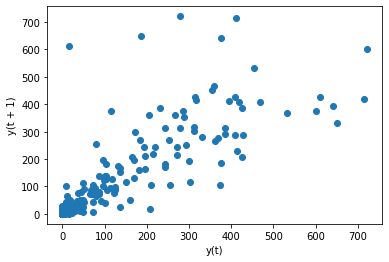

In [15]:
%matplotlib inline

lag_plot(features['NC_au_24h'])
plt.show()

In [16]:
ad_fuller_result = adfuller(features['NC_au_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.428729688953197
p-value: 0.1337912881358546


<font size="2">We have a large negative ADF statistic and P value bigger than 0.05, thus we can reject the null hypothesis and say our time series is stationary. Next step should be look at PACF</font>

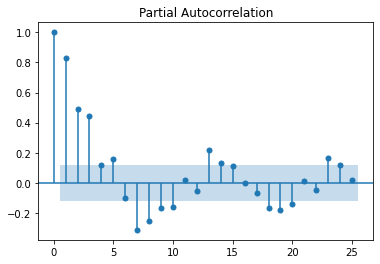

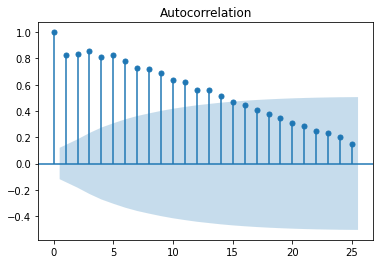

In [17]:
plot_pacf(features['NC_au_24h']);
plot_acf(features['NC_au_24h']);

In [18]:
rho, sigma = yule_walker(features['NC_au_24h'], 3)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.2087391  -0.29672861 -0.44701286]
sigma: 64.98572183466038


<font size="2">
Thus our final equation is y(t) = 65.503 -0.15y(t-1) -0.25y(t-2) - 0.42y(t-3) -0.12y(t-4)</font>

In [19]:
result_data_only = features['NC_au_24h']

In [20]:
result_data_only

Date_reported
2020-01-03     0
2020-01-04     0
2020-01-05     0
2020-01-06     0
2020-01-07     0
              ..
2020-09-23    30
2020-09-24    31
2020-09-25    10
2020-09-26    17
2020-09-27    16
Name: NC_au_24h, Length: 269, dtype: int64

In [21]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [22]:

res = AutoReg(result_data_only, lags = 3).fit()

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [23]:
print(out.format(res.aic, res.hqic, res.bic))

AIC: 8.429, HQIC: 8.456, BIC: 8.497


In [24]:
res = AutoReg(result_data_only, lags=3, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 8.427, HQIC: 8.475, BIC: 8.548


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [25]:
train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept       5.412861
NC_au_24h.L1    0.222217
NC_au_24h.L2    0.293961
NC_au_24h.L3    0.432759
dtype: float64


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [26]:

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=30.307678, expected=30.000000
predicted=3.443578, expected=31.000000
predicted=32.779285, expected=10.000000
predicted=40.638359, expected=17.000000
predicted=29.323493, expected=16.000000
Test RMSE: 20.073


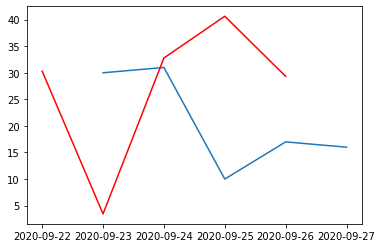

In [27]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Coefficients: intercept       6.309469
NC_au_24h.L1    0.220455
NC_au_24h.L2    0.293583
NC_au_24h.L3    0.433131
dtype: float64
predicted=95.717650, expected=43.000000
predicted=60.797791, expected=52.000000
predicted=78.205114, expected=91.000000
predicted=74.453642, expected=48.000000
predicted=58.773567, expected=52.000000
predicted=59.498184, expected=42.000000
predicted=51.403965, expected=44.000000
predicted=61.979975, expected=41.000000
predicted=63.661616, expected=46.000000
predicted=45.144317, expected=41.000000
predicted=40.735609, expected=34.000000
predicted=26.519593, expected=48.000000
predicted=56.111175, expected=24.000000
predicted=57.334846, expected=13.000000
predicted=39.145926, expected=14.000000
predicted=30.307678, expected=30.000000
predicted=3.443578, expected=31.000000
predicted=32.779285, expected=10.000000
predicted=40.638359, expected=17.000000
predicted=29.323493, expected=16.000000
Test RMSE: 23.502


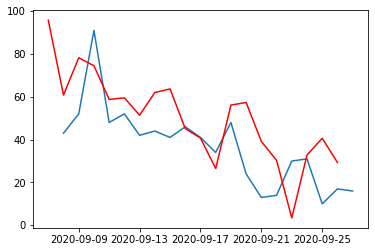

In [28]:
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [29]:
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

Test RMSE: 80.583


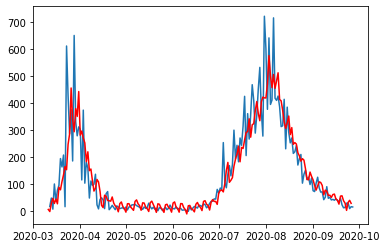

In [30]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [31]:
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

Test RMSE: 72.036


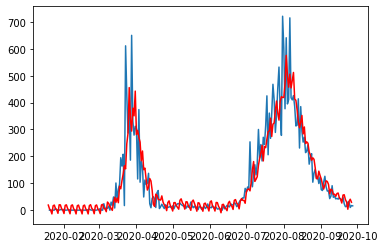

In [32]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

<font size="2">In this case, we could conclude the performance in autoregression is very successful in not only catching up the trends, but also close to the reality number in quantitative measurement.<br><br>
The disadvantage of Autoregression model is that it is a equation model, thus it require up-to-date input to generate tomorrow's prediction, and is harder to extend to longer future compare to LSTM</font>

# Italy

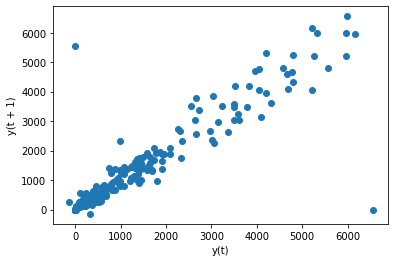

ADF Statistic: -2.37740166983437
p-value: 0.1482164593925191


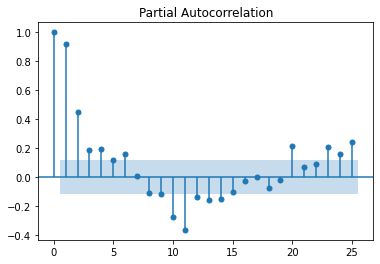

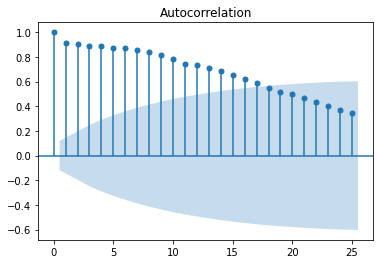

In [33]:
site_it_group.Date_reported =  pd.to_datetime(site_it_group.Date_reported)
site_it_group.set_index('Date_reported', inplace=True)
date_time =  site_it_group.index

selected_features = ['NC_it_24h']

features = site_it_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_it_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_it_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_it_24h']);
plot_acf(features['NC_it_24h']);

rho: [-0.42592656 -0.35189091 -0.18588995]
sigma: 515.2692881667788
AIC: 12.576, HQIC: 12.603, BIC: 12.643
AIC: 12.573, HQIC: 12.621, BIC: 12.694
Coefficients: intercept       55.907243
NC_it_24h.L1     0.439470
NC_it_24h.L2     0.346050
NC_it_24h.L3     0.173979
dtype: float64
predicted=1643.154236, expected=1391.000000
predicted=1316.443466, expected=1640.000000
predicted=1519.779358, expected=1786.000000
predicted=1577.046944, expected=1912.000000
predicted=1647.482821, expected=1869.000000
Test RMSE: 282.987


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


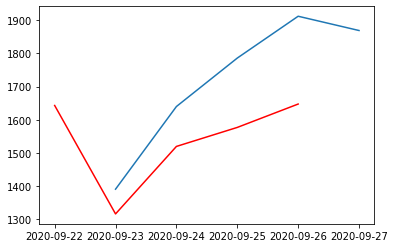

In [34]:
# Training sample 5
rho, sigma = yule_walker(features['NC_it_24h'], 3)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_it_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 3).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=3, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: intercept       55.073735
NC_it_24h.L1     0.434457
NC_it_24h.L2     0.348307
NC_it_24h.L3     0.177433
dtype: float64
predicted=1638.025847, expected=1150.000000
predicted=1345.340275, expected=1369.000000
predicted=1411.440880, expected=1700.000000
predicted=1363.496988, expected=1327.000000
predicted=1474.723881, expected=1616.000000
predicted=1458.307109, expected=1501.000000
predicted=1355.869911, expected=1456.000000
predicted=1617.237886, expected=1008.000000
predicted=1577.683186, expected=1229.000000
predicted=1254.785871, expected=1452.000000
predicted=1189.656996, expected=1583.000000
predicted=1132.269933, expected=1907.000000
predicted=1580.614801, expected=1637.000000
predicted=1779.926178, expected=1587.000000
predicted=1705.643144, expected=1350.000000
predicted=1643.154236, expected=1391.000000
predicted=1316.443466, expected=1640.000000
predicted=1519.779358, expected=1786.000000
predicted=1577.046944, expected=1912.000000
predicted=1647.482821, expected

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


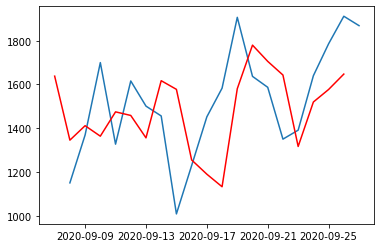

In [35]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Test RMSE: 645.938


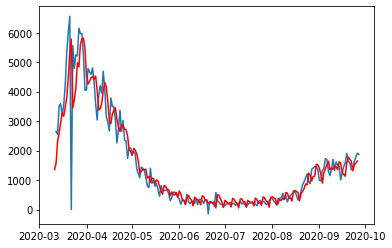

In [36]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 585.739


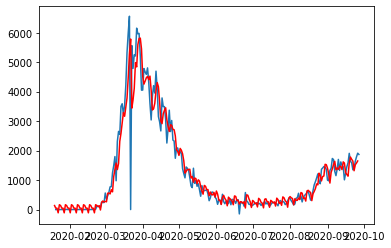

In [37]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()


# China

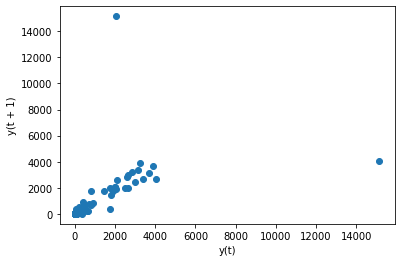

ADF Statistic: -2.9295593549240633
p-value: 0.04201704642193712


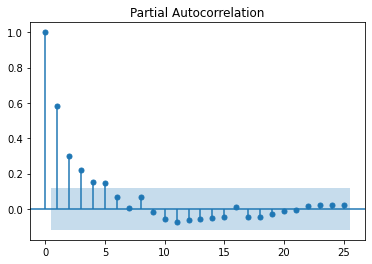

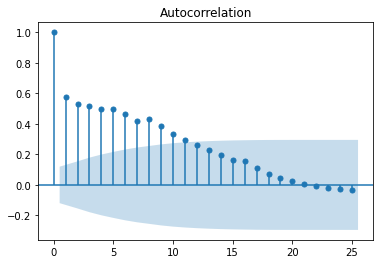

In [38]:
site_cn_group.Date_reported =  pd.to_datetime(site_cn_group.Date_reported)
site_cn_group.set_index('Date_reported', inplace=True)
date_time =  site_cn_group.index

selected_features = ['NC_cn_24h']

features = site_cn_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_cn_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_cn_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_cn_24h']);
plot_acf(features['NC_cn_24h']);

rho: [-0.33890013 -0.21173342 -0.22073104]
sigma: 877.9277213748802
AIC: 13.611, HQIC: 13.638, BIC: 13.678
AIC: 13.623, HQIC: 13.672, BIC: 13.744
Coefficients: intercept       81.425915
NC_cn_24h.L1     0.340633
NC_cn_24h.L2     0.210040
NC_cn_24h.L3     0.216711
dtype: float64
predicted=35.230708, expected=18.000000
predicted=10.577311, expected=10.000000
predicted=79.747238, expected=15.000000
predicted=319.430367, expected=18.000000
predicted=24.772521, expected=15.000000
Test RMSE: 138.163


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


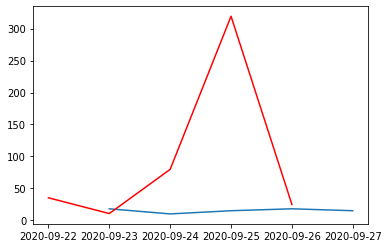

In [39]:
# Training sample 5
rho, sigma = yule_walker(features['NC_cn_24h'], 3)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_cn_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 3).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=3, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


Coefficients: intercept       86.700030
NC_cn_24h.L1     0.340096
NC_cn_24h.L2     0.209555
NC_cn_24h.L3     0.216162
dtype: float64
predicted=32.272317, expected=22.000000
predicted=13.153444, expected=9.000000
predicted=81.649918, expected=13.000000
predicted=324.296986, expected=28.000000
predicted=24.748900, expected=20.000000
predicted=27.995407, expected=23.000000
predicted=8.097273, expected=29.000000
predicted=80.984583, expected=23.000000
predicted=328.292550, expected=16.000000
predicted=32.626302, expected=19.000000
predicted=30.374974, expected=44.000000
predicted=7.390551, expected=17.000000
predicted=85.333768, expected=26.000000
predicted=328.426942, expected=36.000000
predicted=35.684725, expected=14.000000
predicted=35.230708, expected=18.000000
predicted=10.577311, expected=10.000000
predicted=79.747238, expected=15.000000
predicted=319.430367, expected=18.000000
predicted=24.772521, expected=15.000000
Test RMSE: 137.734


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


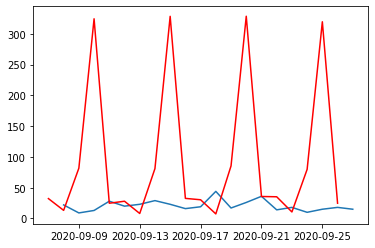

In [40]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 139.375


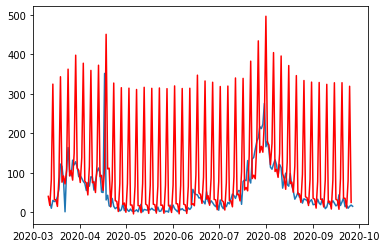

In [41]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 948.634


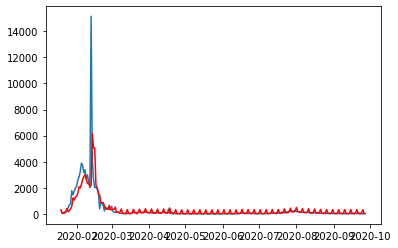

In [42]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

# US

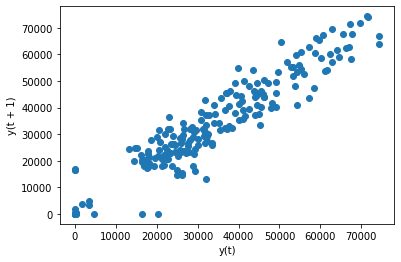

ADF Statistic: -1.4837014667773536
p-value: 0.541558032511702


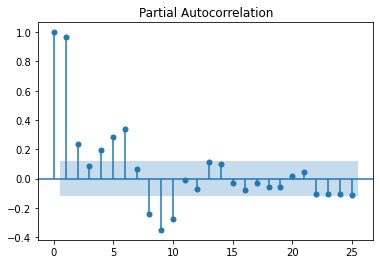

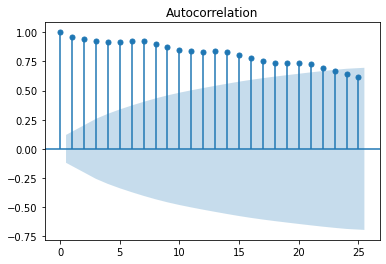

In [43]:
site_us_group.Date_reported =  pd.to_datetime(site_us_group.Date_reported)
site_us_group.set_index('Date_reported', inplace=True)
date_time =  site_us_group.index

selected_features = ['NC_us_24h']

features = site_us_group[selected_features]
features.index = date_time
features.head()

lag_plot(features['NC_us_24h'])
plt.show()

ad_fuller_result = adfuller(features['NC_us_24h'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
plot_pacf(features['NC_us_24h']);
plot_acf(features['NC_us_24h']);

rho: [-0.72078829 -0.16975195 -0.08518026]
sigma: 5359.431219824142
AIC: 17.179, HQIC: 17.206, BIC: 17.246
AIC: 17.207, HQIC: 17.256, BIC: 17.329
Coefficients: intercept       886.654077
NC_us_24h.L1      0.739066
NC_us_24h.L2      0.175102
NC_us_24h.L3      0.058807
dtype: float64
predicted=42701.427196, expected=39145.000000
predicted=38480.566650, expected=49176.000000
predicted=39269.624290, expected=40043.000000
predicted=46053.169491, expected=41254.000000
predicted=41075.098318, expected=50070.000000
Test RMSE: 6805.569


C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


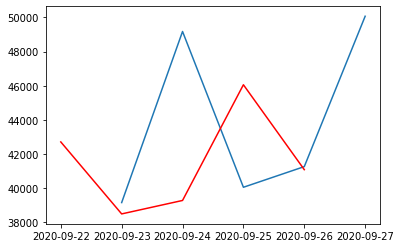

In [44]:
# Training sample 5
rho, sigma = yule_walker(features['NC_us_24h'], 3)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')


result_data_only = features['NC_us_24h']

result_data_only

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'


res = AutoReg(result_data_only, lags = 3).fit()

print(out.format(res.aic, res.hqic, res.bic))

res = AutoReg(result_data_only, lags=3, seasonal=True, period=5).fit()
print(out.format(res.aic, res.hqic, res.bic))

train, test = result_data_only[1:len(result_data_only)-5], result_data_only[len(result_data_only)-5:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: intercept       811.856886
NC_us_24h.L1      0.683410
NC_us_24h.L2      0.215359
NC_us_24h.L3      0.079169
dtype: float64
predicted=47269.230926, expected=33486.000000
predicted=45672.782517, expected=26015.000000
predicted=37139.828051, expected=23204.000000
predicted=28893.816184, expected=31988.000000
predicted=24520.705750, expected=37128.000000
predicted=30165.379502, expected=45523.000000
predicted=35136.001247, expected=40126.000000
predicted=43207.392842, expected=35177.000000
predicted=40514.329055, expected=34111.000000
predicted=36550.709420, expected=34078.000000
predicted=34814.796105, expected=40795.000000
predicted=34219.639452, expected=42618.000000
predicted=39424.001893, expected=48266.000000
predicted=41315.000488, expected=41695.000000
predicted=46142.237855, expected=36766.000000
predicted=42701.427196, expected=39145.000000
predicted=38480.566650, expected=49176.000000
predicted=39269.624290, expected=40043.000000
predicted=46053.169491, expected=41

C:\Users\laiho\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


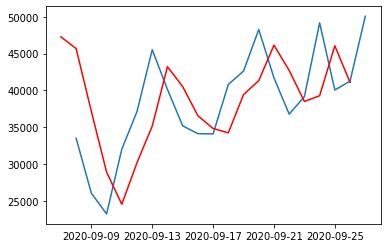

In [45]:
# Training sample 20
train, test = result_data_only[1:len(result_data_only)-20], result_data_only[len(result_data_only)-20:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 7431.625


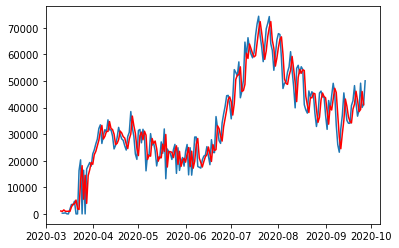

In [46]:
# Training sample 200
train, test = result_data_only[1:len(result_data_only)-200], result_data_only[len(result_data_only)-200:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 6633.227


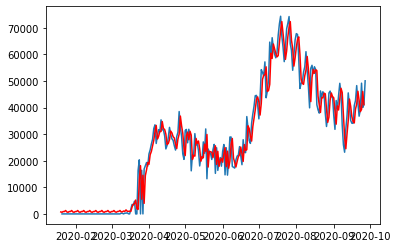

In [47]:
# Training sample 521
train, test = result_data_only[1:len(result_data_only)-521], result_data_only[len(result_data_only)-521:]
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()
